In [1]:
import sys
import os.path as osp

from copy import deepcopy
import datetime
import os
import pickle
import csv
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
from multihist import Hist1d, Histdd
from tqdm.notebook import tqdm
import pandas as pd
from scipy import stats

import strax
import straxen
strax.utils.tqdm = tqdm  # use notebook-aware progress bar

In [2]:
import peaks_utility as psu

In [3]:
st = straxen.contexts.xenonnt_online()

In [4]:
#runs = st.select_runs(available=['peak_basics'])
runs = st.select_runs(run_mode='*commissioning*')

Checking data availability: 100%|██████████| 2/2 [04:34<00:00, 137.14s/it]


In [17]:
runs

,name,number,mode,start,end,tags,livetime,tags.name,raw_records_available,peak_basics_available
0,009158,9158,tpc_selftrigger_commissioning,2020-08-25 05:46:58.904,2020-08-25 05:55:06.899,,00:08:07.995000,NaN,False,False
1,009157,9157,tpc_selftrigger_commissioning,2020-08-25 04:46:23.655,2020-08-25 05:46:26.776,,01:00:03.121000,NaN,False,False
2,009156,9156,tpc_selftrigger_commissioning,2020-08-25 03:45:51.280,2020-08-25 04:45:54.536,,01:00:03.256000,NaN,False,False
3,009155,9155,tpc_selftrigger_commissioning,2020-08-25 02:45:20.929,2020-08-25 03:45:22.154,,01:00:01.225000,NaN,False,False
4,009154,9154,tpc_selftrigger_commissioning,2020-08-25 01:44:45.525,2020-08-25 02:44:48.800,,01:00:03.275000,NaN,False,False
5,009153,9153,tpc_selftrigger_commissioning,2020-08-25 00:44:12.183,2020-08-25 01:44:12.399,,01:00:00.216000,NaN,False,False
6,009152,9152,tpc_selftrigger_commissioning,2020-08-24 23:43:38.946,2020-08-25 00:43:40.061,,01:00:01.115000,NaN,False,False
7,009151,9151,tpc_selftrigger_commissioning,2020-08-24 22:43:08.999,2020-08-24 23:43:09.825,,01:00:00.826000,NaN,False,False
8,009150,9150,tpc_selftrigger_commissioning,2020-08-24 21:42:35.769,2020-08-24 22:42:36.873,,01:00:01.104000,NaN,False,False
9,009149,9149,tpc_selftrigger_commissioning,2020-08-24 20:42:05.898,2020-08-24 21:42:06.651,,01:00:00.753000,NaN,False,False


In [4]:
runs = ['008749','008751','008753','008755']#electrode tests

In [5]:
peaks1 = st.get_array(runs[0],['peaks','peak_basics'],seconds_range=(0,60))
peaks2 = st.get_array(runs[1],['peaks','peak_basics'],seconds_range=(0,60))
peaks3 = st.get_array(runs[2],['peaks','peak_basics'],seconds_range=(0,60))
peaks4 = st.get_array(runs[3],['peaks','peak_basics'],seconds_range=(0,60))

In [6]:
data1 = psu.select_data(st, runs[0])
data2 = psu.select_data(st, runs[1])
data3 = psu.select_data(st, runs[2])
data4 = psu.select_data(st, runs[3])

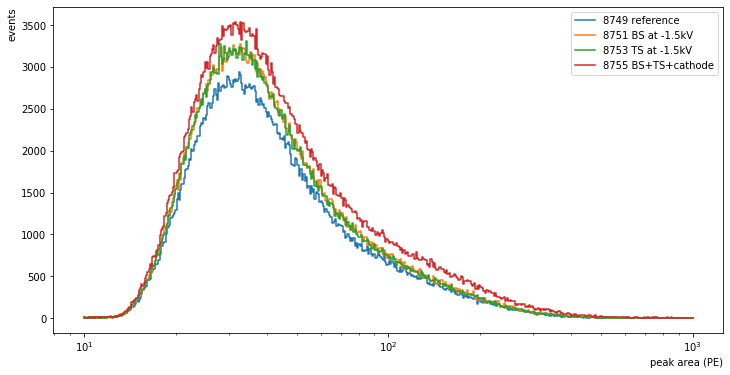

In [7]:
lowl, highl = 1, 3
plt.figure(figsize=(12,6))
p_area1 = Hist1d(data1['area'], bins=(np.logspace(lowl, highl, 500)))
p_area2 = Hist1d(data2['area'], bins=(np.logspace(lowl, highl, 500)))
p_area3 = Hist1d(data3['area'], bins=(np.logspace(lowl, highl, 500)))
p_area4 = Hist1d(data4['area'], bins=(np.logspace(lowl, highl, 500)))
p_area1.plot(label='8749 reference')
p_area2.plot(label='8751 BS at -1.5kV')
p_area3.plot(label='8753 TS at -1.5kV')
p_area4.plot(label='8755 BS+TS+cathode')
plt.xlabel("peak area (PE)", ha='right', x=1)
plt.ylabel("events", ha='right', y=1)
plt.xscale('log')
#plt.yscale('log')
plt.legend()
#psu.plot_area(data3,0.5,5)
#psu.plot_area(data4,0.5,5)

Text(0.5, 1.0, '8755')

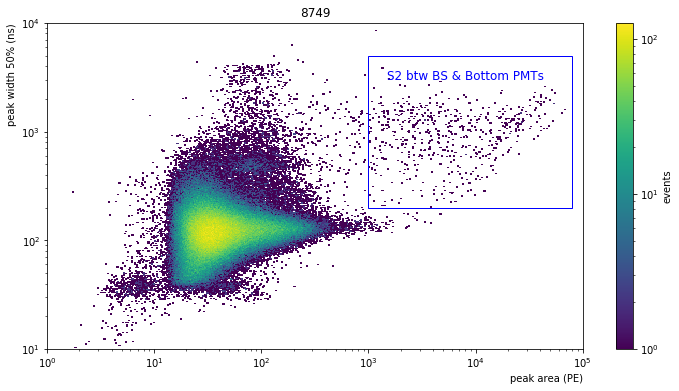

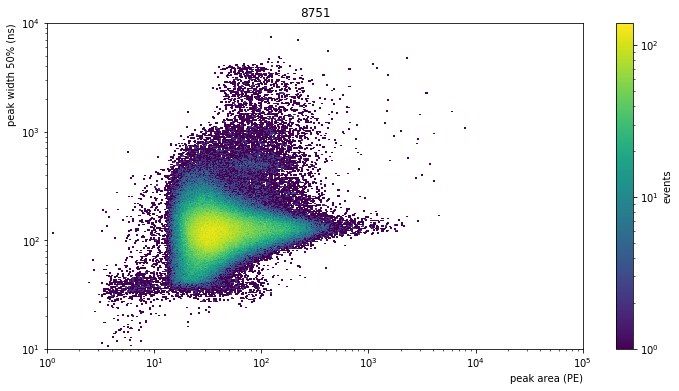

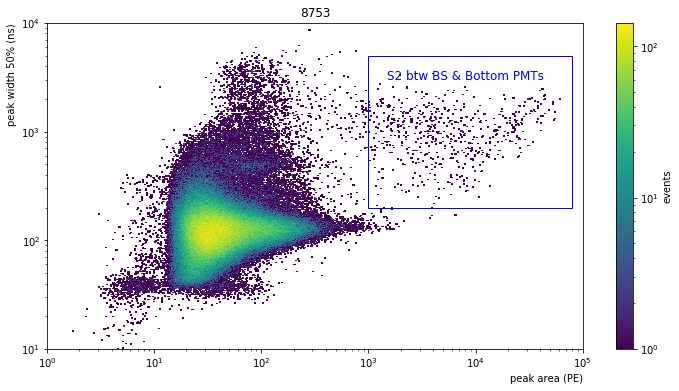

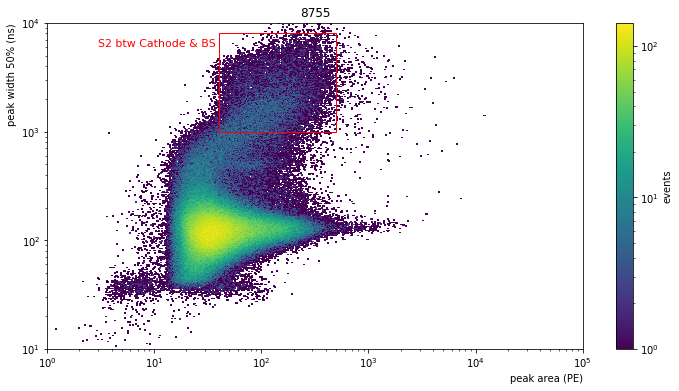

In [8]:
area_cut=(40,500)
width_cut=(1000,8000)
area_cut2=(1e3,8e4)
width_cut2=(200,5e3)
psu.plot_area_width(data1)
psu.rectangle(area_cut2,width_cut2,'b')
plt.text(1.5e3,3e3, 'S2 btw BS & Bottom PMTs', fontsize=12, color='b')
plt.title('8749')
psu.plot_area_width(data2)
plt.title('8751')
psu.plot_area_width(data3)
psu.rectangle(area_cut2,width_cut2,'b')
plt.text(1.5e3,3e3, 'S2 btw BS & Bottom PMTs', fontsize=12, color='b')
plt.title('8753')
psu.plot_area_width(data4)
psu.rectangle(area_cut,width_cut,'r')
plt.text(3,6e3, 'S2 btw Cathode & BS', fontsize=11, color='r')
plt.title('8755')

In [9]:
def calculate_events(data,area_cut,width_cut):
    events = len(data[(data['area']<area_cut[1])&(data['area']>area_cut[0])&
   (data['range_50p_area']<width_cut[1])&(data['range_50p_area']>width_cut[0])])
    livetime = (data['time'][len(data)-1]-data['time'][0])/1e9
    rate = events/livetime
    return rate

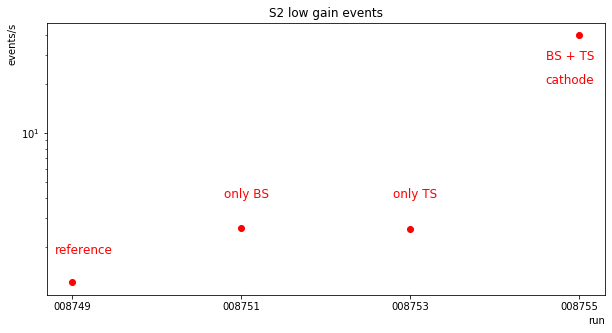

In [10]:
s2_lowgain = np.zeros(4)
s2_lowgain[0] = calculate_events(data1,area_cut,width_cut)
s2_lowgain[1] = calculate_events(data2,area_cut,width_cut)
s2_lowgain[2] = calculate_events(data3,area_cut,width_cut)
s2_lowgain[3] = calculate_events(data4,area_cut,width_cut)
plt.figure(figsize=(10,5))
plt.plot(runs,s2_lowgain,'or')
plt.text(-0.1,1.8, 'reference', fontsize=12, color='r')
plt.text(0.9,4, 'only BS', fontsize=12, color='r')
plt.text(1.9,4, 'only TS', fontsize=12, color='r')
plt.text(2.8,28, 'BS + TS', fontsize=12, color='r')
plt.text(2.8,20, 'cathode', fontsize=12, color='r')
plt.title('S2 low gain events')
plt.xlabel('run', ha='right', x=1)
plt.ylabel('events/s', ha='right', y=1)
plt.yscale('log')

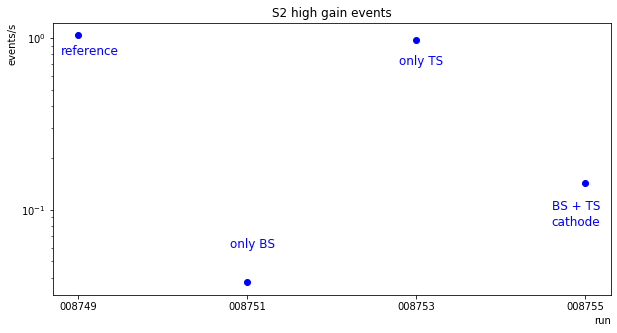

In [11]:
s2_hgain = np.zeros(4)
s2_hgain[0] = calculate_events(data1,area_cut2,width_cut2)
s2_hgain[1] = calculate_events(data2,area_cut2,width_cut2)
s2_hgain[2] = calculate_events(data3,area_cut2,width_cut2)
s2_hgain[3] = calculate_events(data4,area_cut2,width_cut2)
plt.figure(figsize=(10,5))
plt.plot(runs,s2_hgain,'ob')
plt.text(-0.1,0.8, 'reference', fontsize=12, color='b')
plt.text(0.9,0.06, 'only BS', fontsize=12, color='b')
plt.text(1.9,0.7, 'only TS', fontsize=12, color='b')
plt.text(2.8,0.1, 'BS + TS', fontsize=12, color='b')
plt.text(2.8,0.08, 'cathode', fontsize=12, color='b')
plt.title('S2 high gain events')
plt.xlabel('run', ha='right', x=1)
plt.ylabel('events/s', ha='right', y=1)
plt.yscale('log')

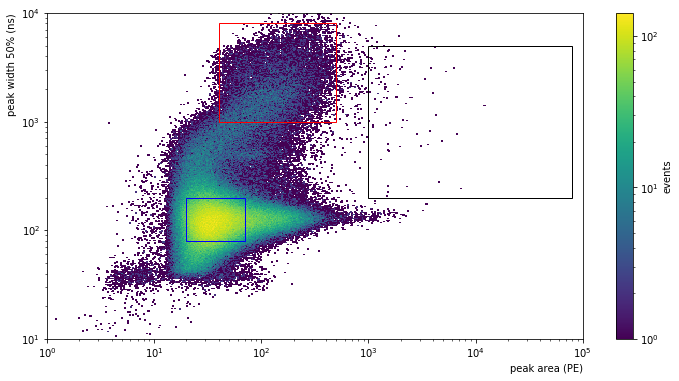

In [12]:
area_cut=(40,500)
width_cut=(1000,8000)
area_cut1=(20,70)
width_cut1=(80,200)
area_cut2=(1e3,8e4)
width_cut2=(200,5e3)
#area_cut3=(40,500)
#width_cut3=(400,600)
psu.plot_area_width(data4)
psu.rectangle(area_cut,width_cut,'r')
psu.rectangle(area_cut1,width_cut1,'b')
psu.rectangle(area_cut2,width_cut2,'k')

In [13]:
def plotwf(peaks,nn,area_cut,width_cut,color='b'):
    peaks=peaks[(peaks['area']<area_cut[1])&(peaks['area']>area_cut[0])&
                     (peaks['range_50p_area']<width_cut[1])&
                      (peaks['range_50p_area']>width_cut[0])]
    dt = peaks['dt'][0]
    print('total number of records',peaks['data'].shape[0])
    dts = np.arange(0,peaks['data'].shape[1]*dt,dt)
    fig, axs = plt.subplots(nn,figsize=(12,8))
    #plt.figure(figsize=(12,6))
    for i in range(nn):
        axs[i].plot(dts,peaks['data'][i],drawstyle='steps',color=color)
        axs[i].set_xlabel("time (ns)", ha='right', x=1)
        axs[i].set_ylabel(f"ADC", ha='right', y=1)

total number of records 1566


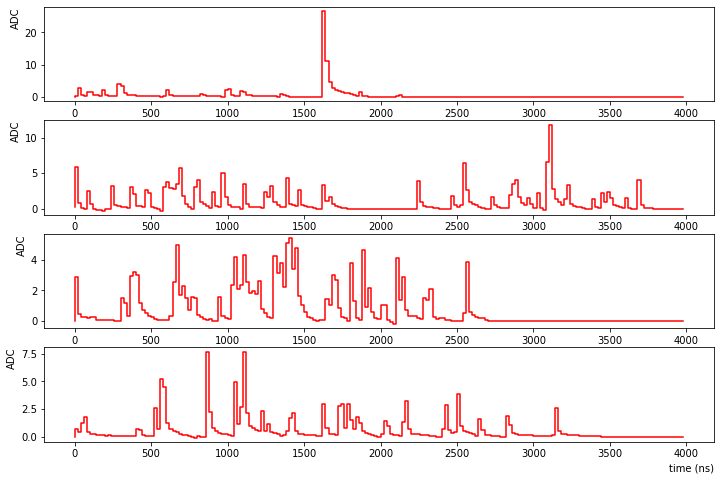

In [14]:
plotwf(peaks4,4,area_cut,width_cut,'r')

total number of records 16083


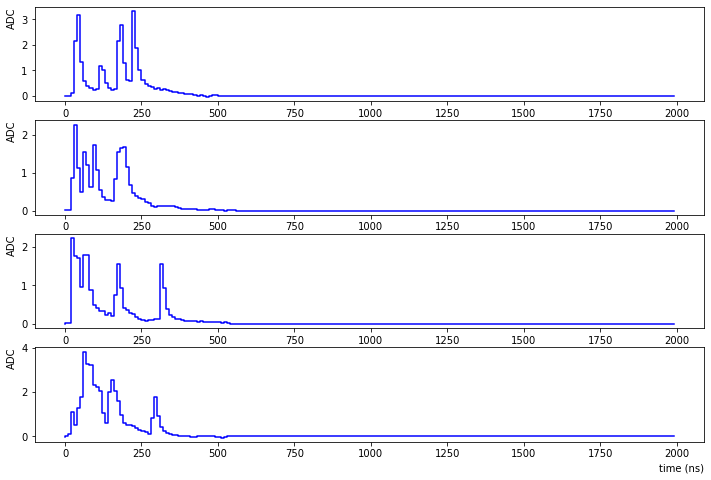

In [15]:
plotwf(peaks4,4,area_cut1,width_cut1,'b')

total number of records 6


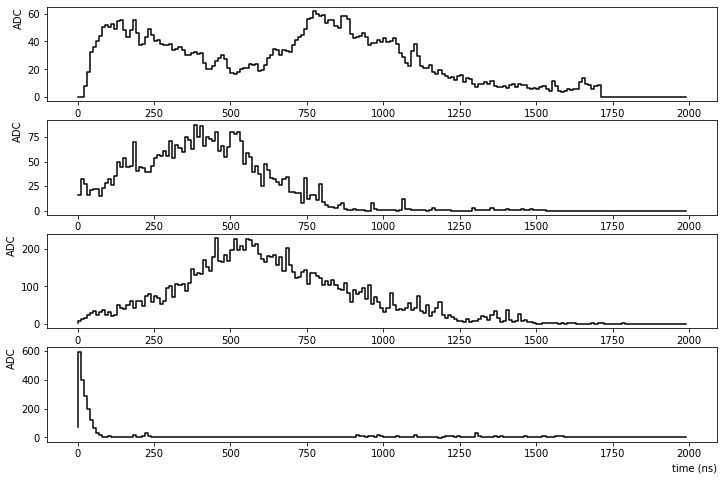

In [16]:
plotwf(peaks4,4,area_cut2,width_cut2,'k')

Text(0.5, 1.0, 'run 8755')

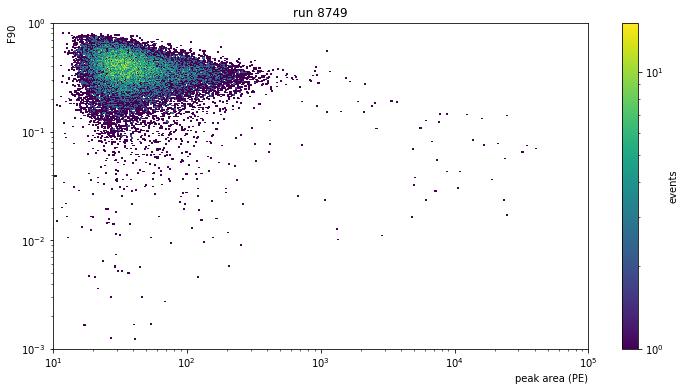

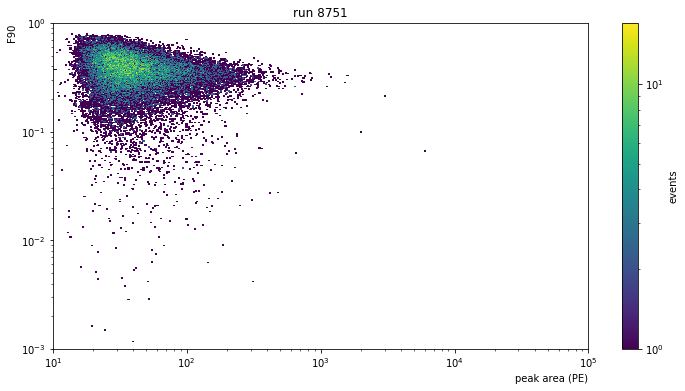

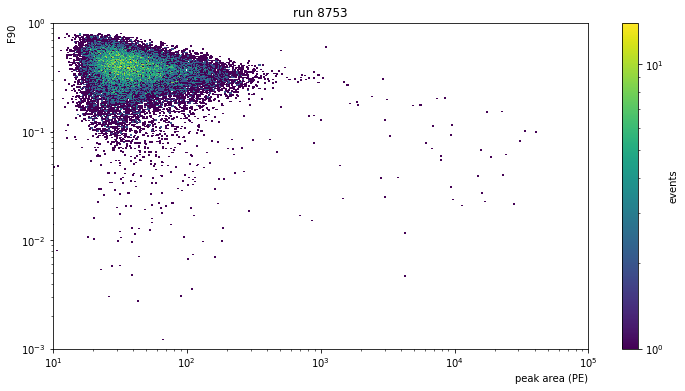

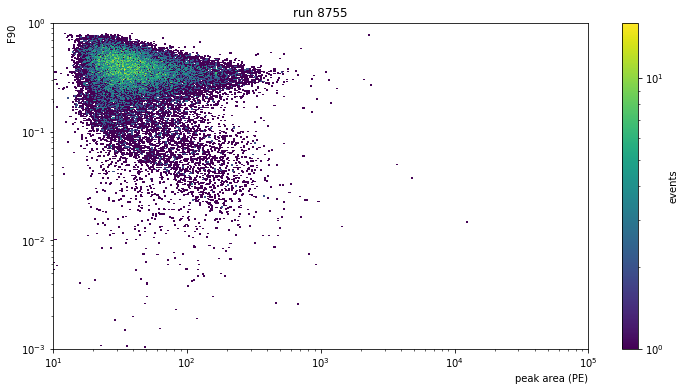

In [17]:
f90_1 = psu.f90(peaks1,1,5)
plt.title('run 8749')
f90_2 = psu.f90(peaks2,1,5)
plt.title('run 8751')
f90_3 = psu.f90(peaks3,1,5)
plt.title('run 8753')
f90_4 = psu.f90(peaks4,1,5)
plt.title('run 8755')

Text(0.5, 1.0, 'run 8755 - area > 500 PE')

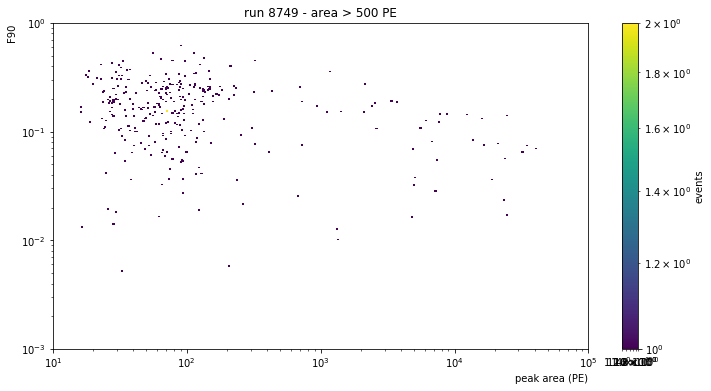

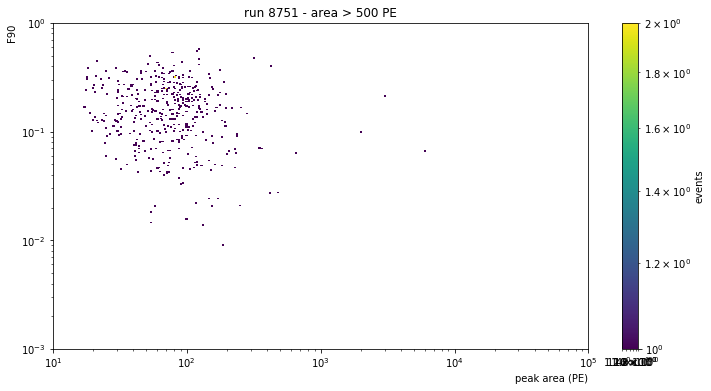

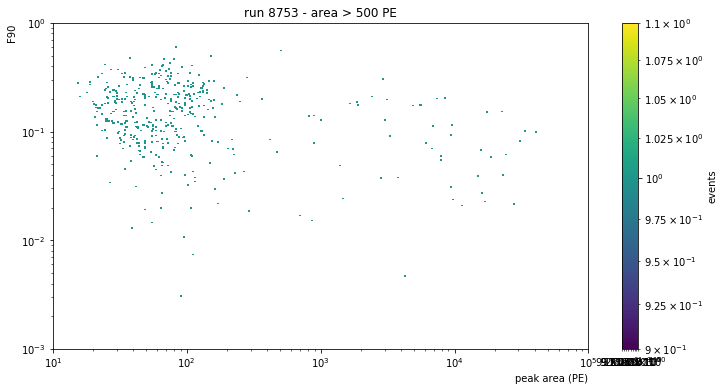

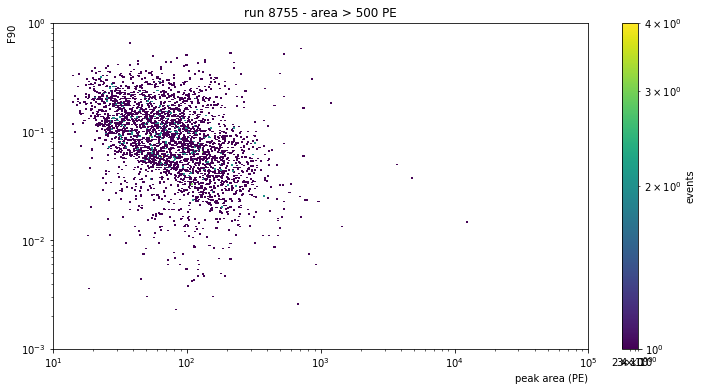

In [18]:
psu.f90(peaks1[peaks1['range_50p_area']>500],1,5)
plt.title('run 8749 - area > 500 PE')
psu.f90(peaks2[peaks2['range_50p_area']>500],1,5)
plt.title('run 8751 - area > 500 PE')
psu.f90(peaks3[peaks3['range_50p_area']>500],1,5)
plt.title('run 8753 - area > 500 PE')
psu.f90(peaks4[peaks4['range_50p_area']>500],1,5)
plt.title('run 8755 - area > 500 PE')